# Pattern Recognition and Machine Learning
# Chapter 2: Probabilitye Distributions

## Probability Distributions: General
* **Density Estimation:** given a finite set $\mathbf{x}_1, \dots, \mathbf{x}_N$ of observations, find the distribution $p(\mathbf{x})$ of $\mathbf{x}$.
  * **Parametric Distributions:** Many usful representations of $p(\mathbf{x})$ depend on some paramters $\theta$, e.g. for a _normal_ distribution $\theta=(\mu, \sigma^2)$
  * **Frequentist's Way:** choose specific parameter $\theta^*$ values by optimizing some criterion (e.g. likelihood)
  * **Bayesian Way:** use a prior distribution over parameters, computer posteriors with Bayes' rule 
    (integrate over all parameters)

> **NOTE:** The same applies to estimating conditional distributions, $p(\mathbf{t} | \mathbf{x})$ and joint distributins $p(\mathbf{t}, \mathbf{x})$. 

* **Conjugate Prior:** leads to a posterior distribution of the same functional form as the prior, which makes life easier. 

## Binary Variable: Frequentist's Way

> **NOTE:** Binary variables are an example of a _discrete_ variable, such as the output of a _classifier_. Understanding how to deal with uncertainty on discrete variables like this will help us to evaluate classification algorithms

Geiven a binary random variable $x \in \{0,1\}$ (e.g. tossing a coin) with 

$$ p(x=1 | \mu) = \mu, \hspace{3em}  p(x=0 | \mu) = 1-\mu.  \hspace{3em} (2.1)$$



$p(x)$ can be described by the _Bernoulli dstribuion:_
$$\begin{align}
\text{Bern}(x|\mu) &= \mu^x (1-\mu)^{1-x}. & (2.2)
\end{align}$$ 

> **NOTE:** Recall $x$ is discrete, so $\text{Bern}(x|\mu)$ is either $\mu$ or $(1-\mu)$, expressing it used an exponential form is mathematically convenient and it will come back to help us later. 

The _maximum likelihood_ estimate for $\mu$ is:
$$\begin{align}
\mu^{ML} &= \frac{m}{N}  \text{  with  }  m=(\text{ #observations of } x = 1) &(2.8)
\end{align}$$ 

> **NOTE:**
> * I derived this on the whiteboard in class, by solving $$\frac{\partial}{\partial \mu} \ln \left\{ \prod_{n=1}^N \text{Bern}(x_n|\mu) \right\}=0,$$ using algebra, logarithmic properties, and the chain rule from calculus. 
> * Maximizing $\ln p(\mathbf{x})$, or mimimizing $-\ln p(\mathbf{x})$, is a useful trick, because it is easier to deal with sums than products when, e.g. calculating the gradient.

This can lead to overfitting, especially for small $N$, e.g. $N=m=3$ yields $\mu^{ML}=1$.

That would mean that a fair coin ($\mu=0.5$) has a $12.5\%$ chance of $m=3$ causing us to beleive that the coin will land head $100\%$ of the time. 

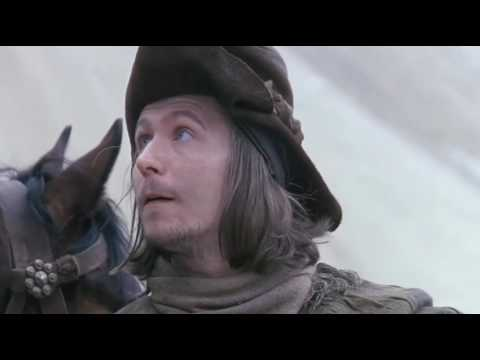

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('gOwLEVQGbrM')

# Binary Variables: Bayesian Way (1), The _Likelihood_

Before going further with a _bayesian_ treatment, we would like to simplify the likelihood function $p(\mathbf{x}|\mu)$. It helps to simplify things by noting that $\mathbf{x}$  has $m$ heads and $N-m$ tails. The probability of seeing $m$ heads is a _binomial_ distribution.

The _binomial distribution_ describes the number $m$ of observations of $x=1$ out of a data set of size $N$:

$$
\begin{align}
\text{Bin}(m|N, \mu) &= {N\choose{m}} \mu^m (1-\mu)^{N-m} & (2.9)\\
{{N}\choose{m}} &= \frac{N!}{(N-m)!m!} & (2.10)
\end{align}
$$

Some explanation:
* For any _specific_ set $\mathbf{x}$ of $m$ heads and $N-m$ tails, the likelihood $p(\mathbf{x}|\mu)=\mu^m (1-\mu)^{(N-m)}$. There are '$N$ _choose_ $m$', or $N\choose{m}$ different inputs $\mathbf{x}$ with $m$ heads, so we add them all together to get $\text{Bin}(m|N,\mu)$. 

In __python__, we can use the [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) object to  explore the binomial distribution

In [37]:
from scipy.stats import binom
print "The odds of 3 heads is: {:0.1%}".format(binom.pmf(3, n=3,p=0.5))

The odds of 3 heads is: 12.5%


Some explanation:
* The `binom` object provides a number of methods and properties that describe the binomial distribution. 
* The `pmf`, or ___probability mass function___ is the a term for a _discrete_ probability function $p(\cdot)$
* The parameters `n` and `p` correspond to $N$ and $\mu$ in our book. 

> **NOTE:** The design of the `binom` object may seem overwhelming, especially if you are not used to object oriented programming -- it defines a number of methods common to _all_ discrete probability distributions in scipy. Just focus on the part of the interface that we want for now (the probability mass function)

The _binomial_ distribution is a discrete probability function (I mean $m$ takes on discrete values) so let's plot it as a bar chart in python:
> **NOTE:** It would be horribly wrong to use regular plot (lines) to visualize this!

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


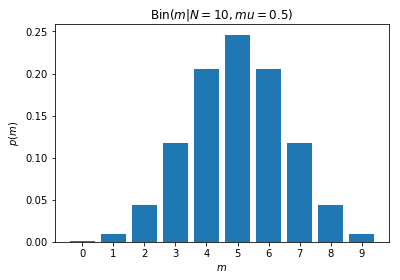

In [38]:
N = 10
mu = 0.5
bar(range(N), [binom.pmf(m, n=N, p=mu) for m in range(N)], )
xticks(range(N))
xlabel('$m$')
ylabel('$p(m)$')
title('Bin$(m|N={}, mu={})$'.format(N,mu));

Consider playing with different values of $N$ and $\mu$ above; notice that with $\mu=0.5$, the binomial distribution is a discrete and finite approximation to a normal distribution... is that true for other values of $\mu$?

## Binary Variables: Bayesian Way (2), The _Prior_

For a Bayesian treatment, we need to model the _prior_ distribution $p(\mu)$. It is convenient to model the prior distribution so that it is similar to the posterior (often also the likelihood). This is called a ___conjugate prior___

> **NOTE:** One benefit of this is that your old posterior can become a prior whenever you observe new data, leading to an __incremental__ estimate. 

The _Bernoulli_ distribution has the form $\mu^x(1-\mu)^{1-x}$, so we want a prior distribution that takes on the same structure.  Because it will make future notation easier, let's assume that $$p(\mu|a, b) \propto \mu^{a-1}(1-\mu)^{b-1}$$ 

I was lazy and used the `propto` ($\propto$) symbol above instead of finding the actual probability (which must integrate to one). It may be useful to determine the normalization constant in the formula above, which is problem 2.5 of your textbook. 

If you do that problem (a hint is on the web, and you will need to use the _gamma_ function), you will prove that 
$$ p(\mu | a, b) = \text{Beta}(\mu|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu^{a-1}(1-\mu)^{b-1},$$
which is the _beta_ distribution, and $\Gamma(x)$ is the _gamma_ function,  a continous version of the factorial function, so that $\Gamma(x)=(x-1)!$ when $x$ is a positive integer. 

$$ \Gamma(x) \equiv \int_{0}^{\infty} u^{x-1}e^{-u} du $$

The _mean_ and variance of the _Beta_ distributuion are: 

$$ 
\begin{array}
\mathbb{E}[\mu] &= \frac{a}{a+b}\\
\text{var}[\mu] &= \frac{ab}{(a+b)^2(a+b+1)}\\
\text{mode}[\mu] &= \frac{a-1}{a+b-2}  & \text{(similar to }\frac{m}{N}\text{)}
\end{array} 
$$

> **NOTE:** I, for one, was struck by how similar the __Beta__ and __Binomial__ distributions are, with the notion that $\Gamma$ is similar to a factoral. It seems like the __Beta__ disribution is (approximately) a reparametrized and continous binomial. 

Let's us **python** to explore the _Gamma_ function and _Beta_ distribution.  

Below, I compare the _Gamma_ function to the _factorial_ function

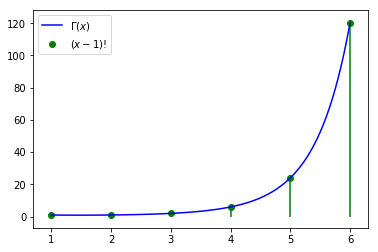

In [13]:
from math import gamma,factorial

x = linspace(1, 6, 100)
plot(x, [gamma(x_) for x_ in x], label='$\Gamma(x)$', color='blue')

scatter(range(1, 7), [factorial(x_-1) for x_ in range(1,7)], color='green', label='$(x-1)!$')
vlines(range(1, 7), 0, [factorial(x_-1) for x_ in range(1,7)], color='green')
legend();

Some explanation:
* The `gamma` and `factorial` functions are in the `math` module, I import them on line 1. 
* I use a _list comprehension_ on line 4 in order to generate $y$ values for each $x$ in the plot of a blue curve. 
* I also use a trailing underscore to avoid name colision of my temporary variable `x_` and the list `x` of $x$ values. 
* I assign a labels to the plot in line 4, and the scatter-plot in line 6. This allows me to display a legend  (line 8). 
* Line 7 drops plumb-lines so you can see that the factorial is evaliated at the integers only.

Now, let's explore the beta distribution and compare it to the binomial distribution. 
Notice that the seem very similer, if you re-scale the binomial distribution to be in the $[0,1]$ interval. 
Also because the beta distribution is over $\mu$ is is a true(continuouse) probability densitiy function (PDF)wheras the binomial is discrete, and I plot it that way. 

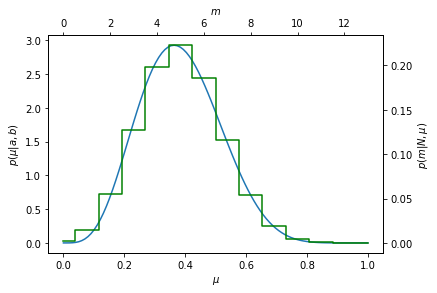

In [109]:
from scipy.stats import beta

x= linspace(0,1,100)

a = 5
b = 8
plot(x, [beta.pdf(x_, a, b) for x_ in x])
xlabel(r'$\mu$')
ylabel(r'$p(\mu|a, b)$')

twiny().set_xlabel(r'$m$')
twinx().set_ylabel(r'$p(m|N, \mu)$')

n= float(a+b)
step(arange(a+b+1), [binom.pmf(x_, n, p=a/n) for x_ in arange(a+b+1)], where='mid', color='green');

show()

Some explanation:
* The `beta` distribution is an _object_ in the `scipy.stats` module. It is a type of _continous distribution_, and so it has a method `pdf`
* The `beta` distribution has two parameters that control the shape, `a` and `b` (they match our text).
* Since I want to play with different values, I define variables (lines 5 and 6) for `a` and `b`
* I want to compare $\text{Beta}$ and $\text{Bin}$, but their horizontal and vertical axes have different scales, so I use `twinx()` ans `twiny()` to inddicate the the axes on the opposite sides of the plot. 
* The `step` function plots a curve as horizontal and vertical lines, I am using it to indicate that $\text{Bin}$ is discrete. 
 * The `where='mid'` argument makes shure the 'step' is halfway betwean each point
 * The `arange` function behaves exactly like `range` except that it returns a numpy array instead of a list. 